# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов, байесовких методов и линейной регрессии.

# Внимание! Задачи по линейной регрессии будут добавлены позже.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2<font size="5" color="red">\*</font> - 3 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 5 баллов
* Задача 5<font size="5" color="red">\*</font> - 2 балла
* Задача 6 - 4 балла
* Задача 7 - 1 балл
* Задача 8 - 3 балла
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* Задача 10 - 5 баллов
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

In [946]:
def draw_confidence_interval(left,  # левая граница интервала
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=(None, None)):  # ограничение по оси y
    x = np.arange(1, 101)
    
    plt.figure(figsize=(15, 8))
    if sample != None:
        plt.scatter(x, sample, alpha=0.2, s=40, label='sample')  # s - размер точек
    plt.plot(x, estimation, color='red', linewidth=2.5, label='estimation')
    plt.fill_between(x, left, right, alpha=0.15)
    plt.legend()
    plt.xlim((1, 100))
    plt.ylim(ylim)
    plt.grid()  # добавляем сетку
    plt.show()

Сгенерируйте выборки и постройте графики доверительных интервалов по следующей схеме.
* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.
* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.
* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.
* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


Генерировать выборки размера 100, уровень доверия брать $\alpha=0.95$. Для вычисления квантилей у каждого распределения из `scipy.stats` есть функция `ppf`.

Сделайте вывод. Насколько часто истинное значение параметра попадает в доверительный интервал? Как длина интервала зависит от размера выборки?

1) Выборка из распределения $\mathcal{N}(0, 1)$

Из домашнего задания: левая граница точного доверительного интервала уровня доверия $\alpha$: $\ \ \overline X - z_{\frac{1+\alpha}{2}}\dfrac{1}{\sqrt n}$.

Правая граница: $\overline X - z_{\frac{1-\alpha}{2}}\dfrac{1}{\sqrt n}$.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


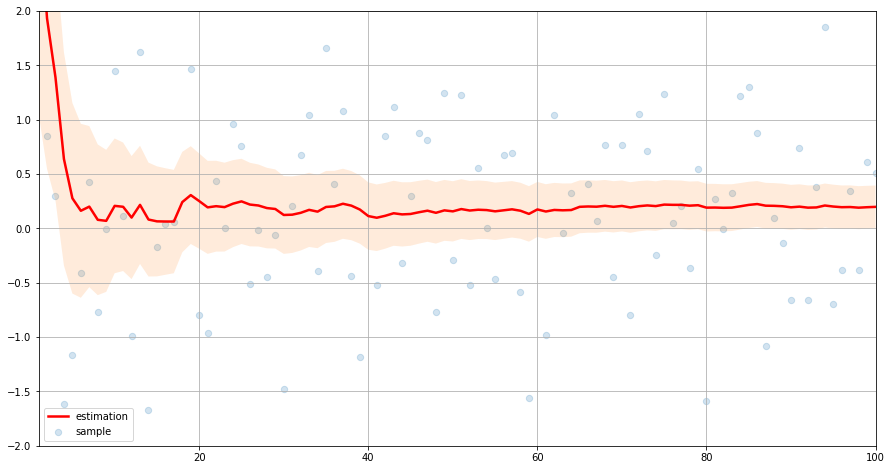

In [947]:
sample = sps.norm.rvs(size=100)
cum_means = sample.cumsum() / np.arange(1, 101)
alpha = 0.95
left = cum_means - sps.norm.ppf((1 + alpha) / 2) / (np.arange(1, 101) ** (0.5))
right = cum_means - sps.norm.ppf((1 - alpha) / 2) / (np.arange(1, 101) ** (0.5))
draw_confidence_interval(left, right, cum_means, sample, [-2, 2])

2) Выборка из распределения $U[0, 1]$

Из домашнего задания: левая граница точного доверительного интервала уровня доверия $\alpha$:$\ \ X_{(n)}$.

Правая граница: $\dfrac{X_{(n)}}{\sqrt[n]{1-\alpha}}$.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


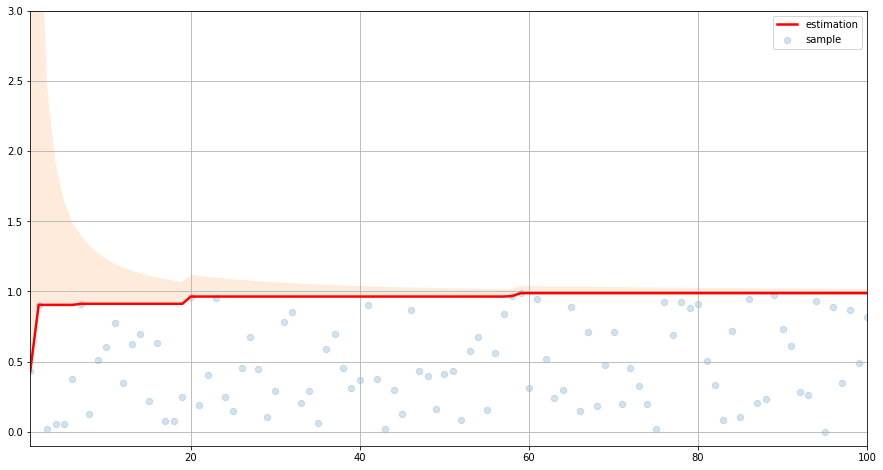

In [948]:
sample = sps.uniform.rvs(size=100)
cum_maxs = np.maximum.accumulate(sample)
alpha = 0.95
left = cum_maxs 
right = cum_maxs * ((1 - alpha) ** (- 1.0 / np.arange(1, 101)))
draw_confidence_interval(left, right, cum_maxs, sample, [-0.1, 3])

3) Выборка из распределения $\Gamma(3, 2)$

Из домашнего задания: левая граница точного доверительного интервала уровня доверия $\alpha$:$\ \ \dfrac{2}{\overline{X}} - \dfrac{\sqrt{2} \cdot z_{\frac{1 + \alpha}{2}}}{\sqrt{n}\cdot\overline{X}}$.

Правая граница: $\ \ \dfrac{2}{\overline{X}} + \dfrac{\sqrt{2} \cdot z_{\frac{1 + \alpha}{2}}}{\sqrt{n}\cdot\overline{X}}$.

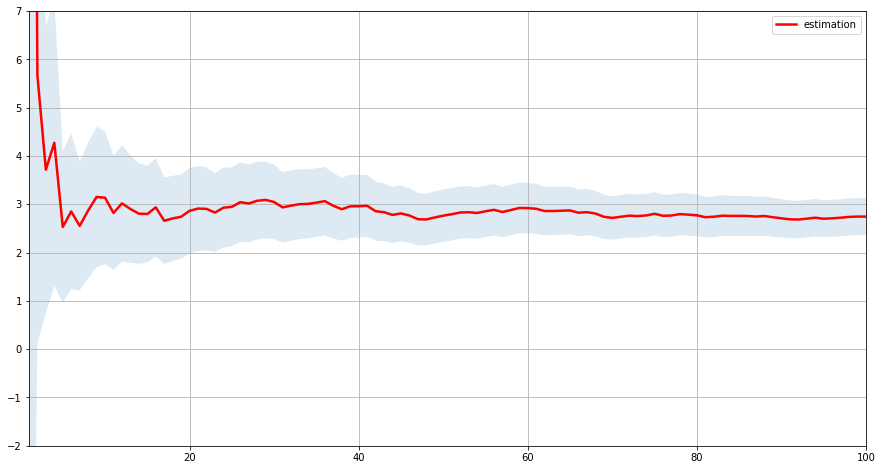

In [949]:
sample = sps.gamma.rvs(size=100, a=2, scale=1/3)
cum_means = sample.cumsum() / np.arange(1, 101)
alpha = 0.95
left = 2 / cum_means - np.sqrt(2) * sps.norm.ppf((1 + alpha) / 2) / (np.arange(1, 101) ** (0.5)) / cum_means
right = 2 / cum_means + np.sqrt(2) * sps.norm.ppf((1 + alpha) / 2) / (np.arange(1, 101) ** (0.5)) / cum_means
draw_confidence_interval(left, right, 2 / cum_means, ylim=[-2, 7])

4) Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом

Из домашнего задания: левая граница точного доверительного интервала уровня доверия $\alpha$: $\ \ -\frac{\pi}{2\sqrt{n}}z_{\frac{1+\alpha}{2}}+{\hat{\mu}}$.

Правая граница: $-\frac{\pi}{2\sqrt{n}}z_{\frac{1-\alpha}{2}}+{\hat{\mu}}$.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


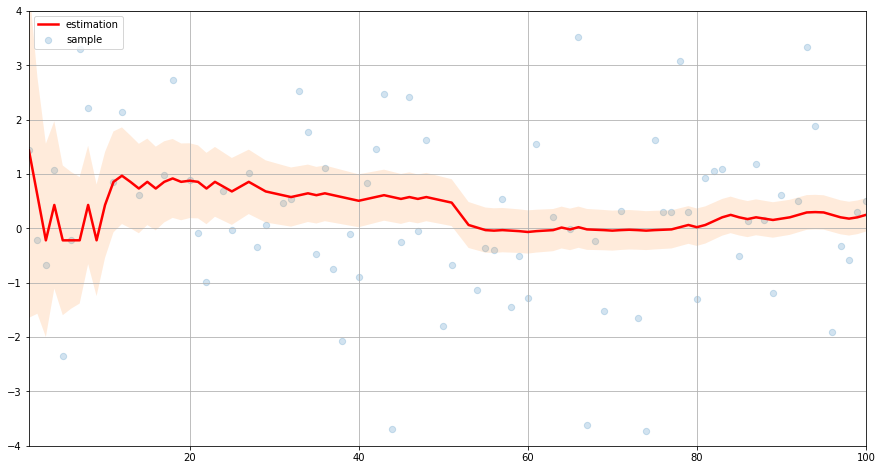

In [950]:
sample = sps.cauchy.rvs(size=100)
cum_medians = [np.median(sample[:i+1]) for i in range(len(sample))]
alpha = 0.95
left = -np.pi / (np.arange(1, 101) ** (0.5)) / 2 * sps.norm.ppf((1 + alpha) / 2) + cum_medians
right = -np.pi / (np.arange(1, 101) ** (0.5)) / 2 * sps.norm.ppf((1 - alpha) / 2) + cum_medians
draw_confidence_interval(left, right, cum_medians, sample, [-4, 4])

5) Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


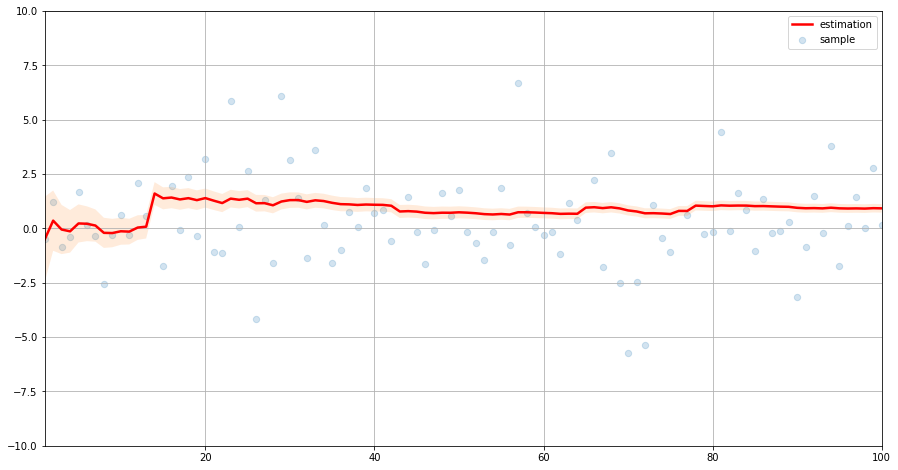

In [990]:
sample = sps.cauchy.rvs(size=100)
estim = sample.cumsum() / np.arange(1, 101)
alpha = 0.95
left = estim - (np.arange(1, 101) ** (-0.5)) * sps.norm.ppf((1 + alpha) / 2)
right = estim - (np.arange(1, 101) ** (-0.5)) * sps.norm.ppf((1 - alpha) / 2)
draw_confidence_interval(left, right, estim, sample, [-10, 10])

**Вывод:** На всех построенных графиках хорошо видно, что истинное значение параметра в большинстве случаев лежит в доверительном интервале. Также мы можем сделать вывод, что с увеличением размера выборки длина интервала заметно уменьшается. А в пункте 2) интервал практически вплотную начинает прилегать к графику истинного значения параметра, начиная с некоторого значения размера выборки (n = 60).
В последнем случае истинное значение параметра редко попадает в интервал, потому выборочное среднее - плохо оценивает параметр.

**Задача 2<font size="5" color="red">\*</font>.** 
Аналогично заданию 1 постройте доверительные интервалы для следующих случаев
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

**Задача 3<font size="5" color="red">\*</font>.** 
Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

Определим функцию, которая строит график зависимости $D_n$ от $n$.
Будем искать D[n] следующим образом:
для каждого T_i смотрим расстояние от графика ФР стандартного нормального распределения до графика эмперической ФР (пренебрегая выколотыми точками) и берем из них всех максимум.

In [1061]:
K = 100000
N = 300
def Draw_supremums(T, label):
    T.sort(axis=0)
    F = sps.norm.cdf(T)
    F_emp = np.arange(0, K + 1) / K
    D = np.empty(N)
    for i in range(N):
        D[i] = max(max(F[:, i] - F_emp[0: K]), max(F[:, i] - F_emp[1: K + 1]))
    plt.plot(D, label=label)
    plt.legend()
    plt.xlim((0, N))
    plt.ylim(0,0.05)
    plt.xlabel('Номер выборки')
    plt.grid(linestyle='--')

1) $X_1, ..., X_n \sim \mathcal{N}(0, 1)$.

$T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.

Считаем $S^2$ по формуле: $S^2= \overline {X^2} - \overline X^2$

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


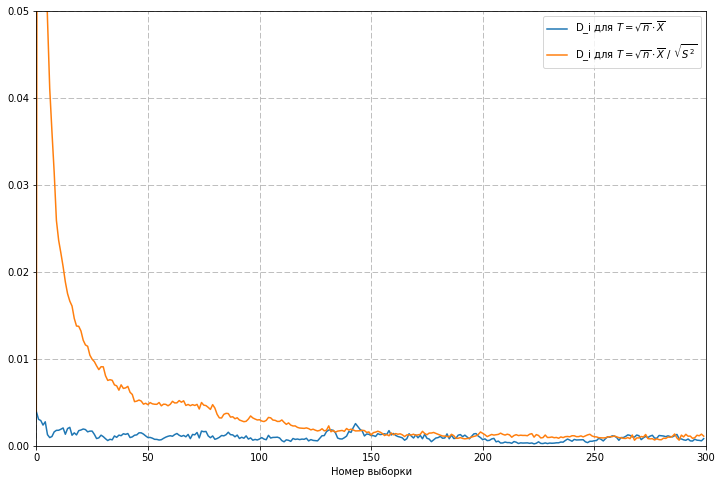

In [1062]:
sample1 = sps.norm.rvs(size=(K, N))
sample2 = sample1 ** 2
mean1 = sample1.cumsum(axis=1) / np.arange(1, N + 1)
mean2 = sample2.cumsum(axis=1) / np.arange(1, N + 1)
T1 = mean1 * (np.arange(1, N + 1) ** (0.5))
T2 = T1 / ((mean2 - (mean1) ** 2) ** (0.5))
T2[:, 0] = T1[:, 0]  # отдельно для первого столбца
plt.figure(figsize=(12, 8))
Draw_supremums(T1, 'D_i для $T = \sqrt{n} \cdot \overline{X}$')
Draw_supremums(T2, 'D_i для $T = \sqrt{n} \cdot \overline{X} \ / \  \sqrt{S^2}$')
plt.show()

**Вывод:** На графике мы наблюдаем оранжевый скачок в начале, потому что на малых n выборочная дисперсия S - не точная. Это так, потому что T_i (столбец матрицы T) зависит от n, а значит, вместе с ним зависит и S.
Из поведения графиков D_i (sup отклонения эмперической функции от нормального распределения) мы видим, что, начиная с первого элемента выборки, распределение обеих статистик имеет нормальное распреление.

2) $X_1, ..., X_n \sim Bern(p), p = 0.5$.

$T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


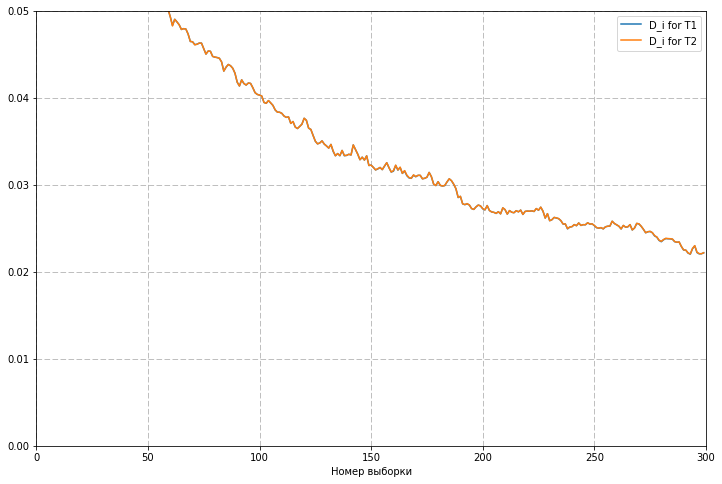

In [1063]:
p = 0.5
sample1 = sps.bernoulli.rvs(p, size=(K, N))
sample2 = sample1 ** 2
mean1 = sample1.cumsum(axis=1) / np.arange(1, N + 1)
mean2 = sample2.cumsum(axis=1) / np.arange(1, N + 1)
T1 = ((mean1 - p) * (np.arange(1, N + 1) ** (0.5))) / ((p * (1 - p)) ** (0.5))
T2 = (T1 * ((p * (1 - p)) ** (0.5))) / ((mean2 - (mean1) ** 2) ** (0.5))
T2[:, 0] = T1[:, 0]  # отдельно для первого столбца
plt.figure(figsize=(12, 8))
Draw_supremums(T1, 'D_i for T1')
Draw_supremums(T2, 'D_i for T2')
plt.show()

**Вывод:** Из построенного графика явно видно, что распределение данных статистик не сразу приближается нормальным распределением, а только, начиная примерно с 60ой выборки, можно считать, что статистика с неизвестной дисперсией и с известной распределены нормально. (то есть, примерно начиная с $n=60$ распределение данных статистик хорошо приближается нормальным распределением). Также обратим внимание, что графики практически всюду совпадают. Это говорит о том, что выборочная дисперсия практически равна настоящей.

3) $X_1, ..., X_n \sim Cauchy$.

$T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

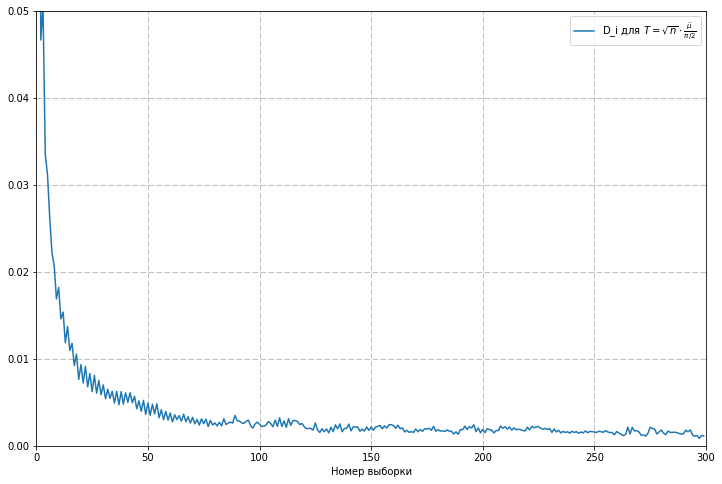

In [1064]:
sample = sps.cauchy.rvs(size=(K, N))
median = np.empty(shape=(K,N))
for i in range(K):
    median[i] = [np.median(sample[i,:j+1]) for j in range(N)]
T = (median * (np.arange(1, N + 1) ** (0.5))) / np.pi * 2
plt.figure(figsize=(12, 8))
Draw_supremums(T, 'D_i для $T = \sqrt{n} \cdot \\frac{\widehat{\mu}}{\pi/2}$')
plt.show()

**Вывод:** Из построенного графика видно, что начиная практически с самой первой выборки, можно апроксимировать данную статистику нормальным распределением.

**Задача 5<font size="5" color="red">\*</font>.** 
Проведите исследование аналогичное задаче 4 для статистик из задачи 2.

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [956]:
def normal_summary(sample):
    alpha = 0.95
    size = len(sample)
    mean = np.mean(sample)
    median = np.median(sample)
    std = np.std(sample)
    T1 = mean - std * sps.norm.ppf((1 + alpha) / 2) / (size) ** (0.5)
    T2 = mean - std * sps.norm.ppf((1 - alpha) / 2) / (size) ** (0.5)
    KS = sps.kstest(sample, sps.norm(loc=mean, scale=std).cdf)
    
    print('size: %d' % len(sample))
    print('sample mean: %.2f' % sample.mean())
    print('sample median: %.2f' % np.median(sample))
    print('sample std: %.2f' % np.std(sample))
    print('0.95 confidence interval: (%.2f, %.2f)' % (T1 , T2))
    print('KS-stat: %.3f' % KS[0])

Протестируйте функцию на выборках из нормального распределения и на выборках из других распределений. Какой вывод можно сделать о поведении статистики Колмогорова-Смирнова?

In [957]:
sample = sps.norm.rvs(size=300)
normal_summary(sample)

size: 300
sample mean: -0.19
sample median: -0.10
sample std: 0.97
0.95 confidence interval: (-0.30, -0.08)
KS-stat: 0.039


In [958]:
sample = sps.norm.rvs(size=500, loc=5, scale=4)
normal_summary(sample)

size: 500
sample mean: 4.94
sample median: 4.79
sample std: 4.04
0.95 confidence interval: (4.59, 5.30)
KS-stat: 0.022


In [959]:
sample = sps.norm.rvs(size=178, loc=13, scale=0.81)
normal_summary(sample)

size: 178
sample mean: 12.94
sample median: 12.97
sample std: 0.88
0.95 confidence interval: (12.81, 13.07)
KS-stat: 0.048


In [960]:
sample = sps.norm.rvs(size=178, loc=0.36, scale=0.12)
normal_summary(sample)

size: 178
sample mean: 0.37
sample median: 0.37
sample std: 0.12
0.95 confidence interval: (0.35, 0.39)
KS-stat: 0.046


In [961]:
sample = sps.cauchy.rvs(size=200, scale=4)
normal_summary(sample)

size: 200
sample mean: 2.49
sample median: -0.11
sample std: 145.69
0.95 confidence interval: (-17.70, 22.68)
KS-stat: 0.392


In [962]:
sample = sps.expon.rvs(size=200, loc=5, scale=1/4)
normal_summary(sample)

size: 200
sample mean: 5.27
sample median: 5.16
sample std: 0.30
0.95 confidence interval: (5.23, 5.31)
KS-stat: 0.190


In [963]:
sample = sps.gamma.rvs(size=200, a=1)
normal_summary(sample)

size: 200
sample mean: 1.20
sample median: 0.82
sample std: 1.14
0.95 confidence interval: (1.04, 1.36)
KS-stat: 0.153


**Вывод:** после ряда проделанных тестов мы можем обратить внимание, что если значение статистики Колмогорова-Смирнова меньше 0.12, то выборка, вероятно, принадлежит нормальному закону.

Скачайте данные http://archive.ics.uci.edu/ml/datasets/Wine, файл `wine.data`.
Что вы можете сказать про столбцы 1, 4, 8 (нумерация с нуля), соответсвующие 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'?

In [964]:
X = pd.read_csv('wine.data.txt', sep=',', header=None)
print ('Summary for Alcohol:')
normal_summary(X[1])
print ('\nSummary for Alcalinity of ash:')
normal_summary(X[4])
print ('\nSummary for Nonflavanoid phenols:')
normal_summary(X[8])

Summary for Alcohol:
size: 178
sample mean: 13.00
sample median: 13.05
sample std: 0.81
0.95 confidence interval: (12.88, 13.12)
KS-stat: 0.069

Summary for Alcalinity of ash:
size: 178
sample mean: 19.49
sample median: 19.50
sample std: 3.33
0.95 confidence interval: (19.01, 19.98)
KS-stat: 0.063

Summary for Nonflavanoid phenols:
size: 178
sample mean: 0.36
sample median: 0.34
sample std: 0.12
0.95 confidence interval: (0.34, 0.38)
KS-stat: 0.115


**Вывод:** для каждого столбца мы получили, что значение статистики Колмогорова-Смирнова меньше 1.2, то есть, исходя из нашего наблюдения, можем сказать, что значения в этих столбцах распределены нормально.

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую модификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\dfrac{1}{k}\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

**Решение:** (немного необычный способ) Рассмотрим подинтегральную функцию: $q(s)p_s(x)$, где q(s) --- плотность Коши.

$$q(s)p_s(x) = q(s) \left(\tfrac{1}{2 \pi}\right)^{\tfrac{n}{2}} e^{-\tfrac{1}{2}\sum \limits_{i=1}^{n} (x_i - s)^2} = \left( \frac{1}{\pi(1+s^2)} \left(\frac{1}{2 \pi}\right)^{\frac{n-1}{2}} e^{-\tfrac{1}{2}\sum \limits_{i=2}^{n} (s - x_i)^2}\right) \cdot \left( \left( \frac{1}{2 \pi}\right)^{\frac{1}{2}} e^{-\frac{1}{2} (s - x_1)^2} \right) = \left( f(s) \right) \cdot \left( p(s) \right)$$

Тогда интеграл из знаменателя будет иметь вид: $\int\limits_{\Theta} f(s) p(s) ds$, где $p(s)$ --- плотность нормального $\mathcal{N}(X_1, 1)$

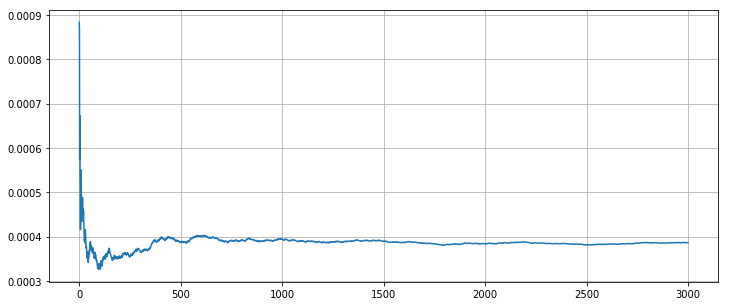

In [1001]:
def f(s, params):
    n = params.size
    exp = np.exp((-((s - params) ** 2) / 2).sum())
    return 1 / (np.pi * (1 + s ** 2)) * ((1 / (2 * np.pi)) ** (n / 2)) * exp

sample = sps.norm.rvs(size=5, loc=0, scale=1)
mean = sample[0]  # X_1 - м.о. для p(s)
params = sample[1:]  # X_2, ... , X_5 - параметры для f(s)

help_sample_size = 3000
help_sample = sps.norm.rvs(size=help_sample_size, loc=mean, scale=1)

c = np.empty(shape=help_sample_size)
for i in range(help_sample_size):
    c[i] = f(help_sample[i], params)
integral = c.cumsum() / range(1, help_sample_size + 1) 

plt.figure(figsize=(12, 5))
plt.plot(integral)
plt.grid()
plt.show()

На графике видно, что начиная с отметки = 500, вычисленное значение перестает колебаться. То есть размера вспомогательной выборки = 500 достаточно, чтобы с большой точностью посчитать значение $c$ (знаменатель в формуле Байеса).

In [1002]:
theta = np.linspace(-5, 5, 10000)
cauchy_pdf = sps.cauchy.pdf(theta)
norm_pdf1 = sps.norm.pdf(sample[0], loc=theta)
norm_pdf2 = sps.norm.pdf(sample[1], loc=theta)
norm_pdf3 = sps.norm.pdf(sample[2], loc=theta)
norm_pdf4 = sps.norm.pdf(sample[3], loc=theta)
norm_pdf5 = sps.norm.pdf(sample[4], loc=theta)
norm_pdf = norm_pdf1 * norm_pdf2 * norm_pdf3 * norm_pdf4 * norm_pdf5
pdf = cauchy_pdf * norm_pdf / integral[500]

In [1003]:
ME = (pdf * 0.001 * theta).sum()  # вычислим интеграл мат. ожидания методом прямогульников
print(ME)

-0.0650683176669


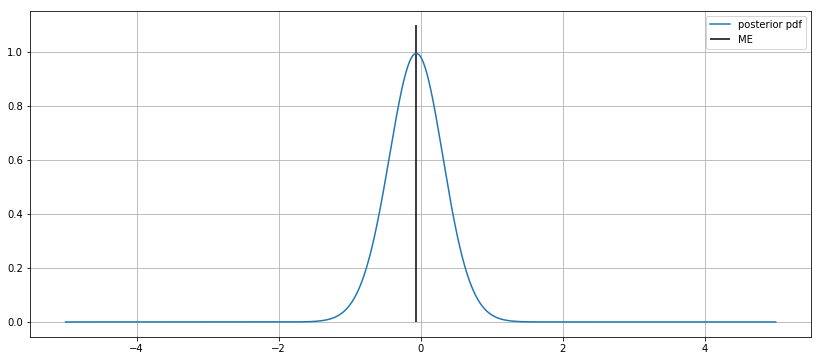

In [1004]:
plt.figure(figsize=(14, 6))
plt.plot(theta, pdf, label='posterior pdf')
plt.vlines(x=ME, ymin=0, ymax=1.1, label='ME')
plt.legend()
plt.grid()

Проверим, что площадь под графиком плотности апостериорного распределения действительно $\approx$ 1.

In [1007]:
print((pdf * 0.001).sum())

0.967724300956


**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

Ниже приведена реализация некоторых вспомогательных функций.

In [7]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки + 1, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):    
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [971]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    N = len(sample)
    params = np.empty(shape=(N + 1, 2))
    for n in range(N + 1):
        params[n] = (a + sample[: n].sum()), b - sample[: n].sum() + n
    
    return params

* 0) монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* 1) монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* 2) монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* 3) монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* 4) ничего не известно (все значения равновероятны)

In [1010]:
grid = np.linspace(0, 1, 1000)

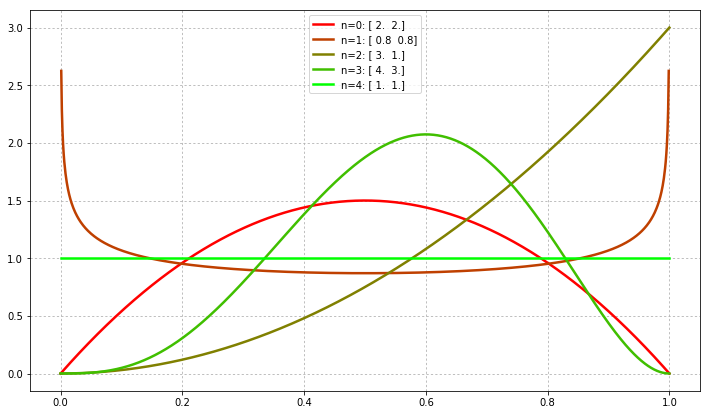

In [1011]:
params = np.array([[2, 2], [0.8, 0.8],[3, 1], [4, 3], [1, 1]])

draw_posteriori(grid, sps.beta, params)

**Замечание:** Если первый параметр больше второго, то вершина графика смещена вправо. Если наоборот, то наоборот.

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

## Симметричная монета

In [1021]:
sample1 = sps.bernoulli.rvs(size=15, p=1/2)

### Правильно подобранные параметры

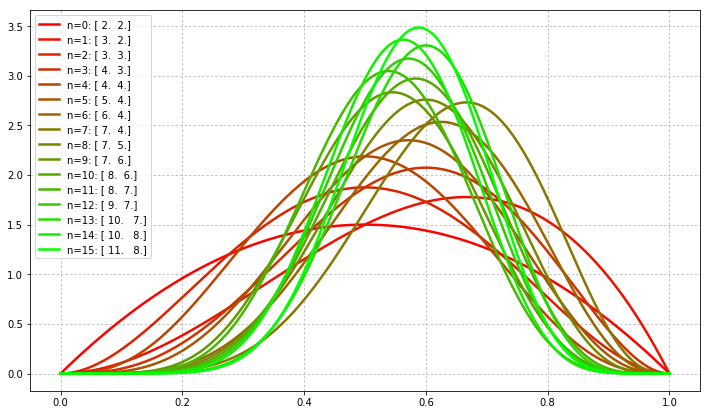

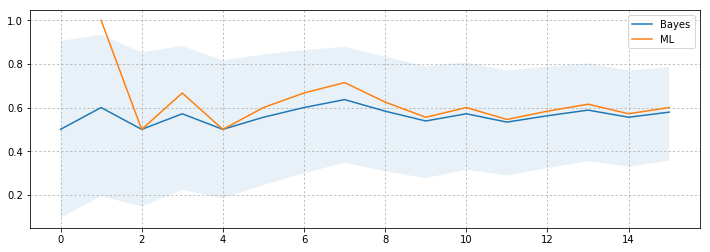

In [1035]:
draw_posteriori(grid=grid, distr_class=sps.beta, post_params=bern_posterior_params(sample1, 2, 2))
ml = sample1.cumsum() / range(1, 16)
draw_estimations(ml, distr_class=sps.beta, post_params=bern_posterior_params(sample1, 2, 2))

### Неправильно подобранные параметры

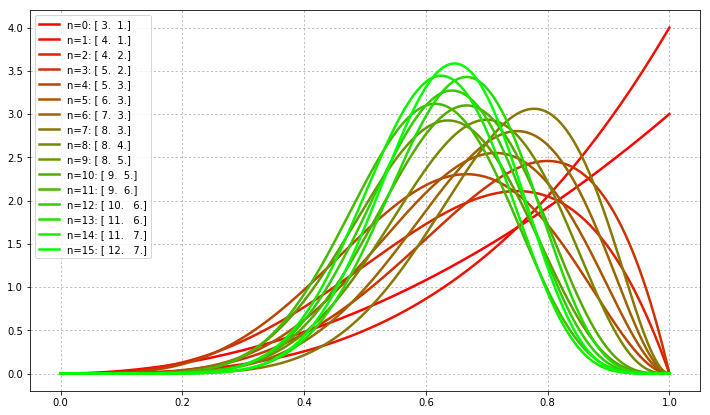

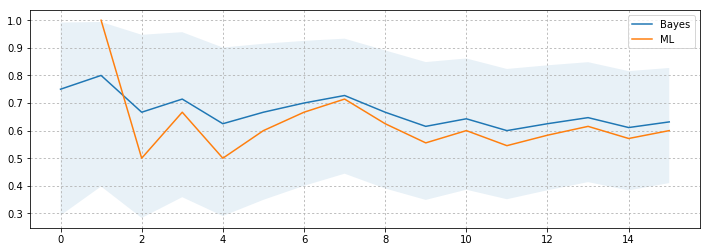

In [1036]:
draw_posteriori(grid=grid, distr_class=sps.beta, post_params=bern_posterior_params(sample1, 3, 1))
ml = sample1.cumsum() / range(1, 16)
draw_estimations(ml, distr_class=sps.beta, post_params=bern_posterior_params(sample1, 3, 1))

## Несимметричная монета

In [1042]:
sample2 = sps.bernoulli.rvs(size=15, p=1/3)

### Правильно подобранные параметры

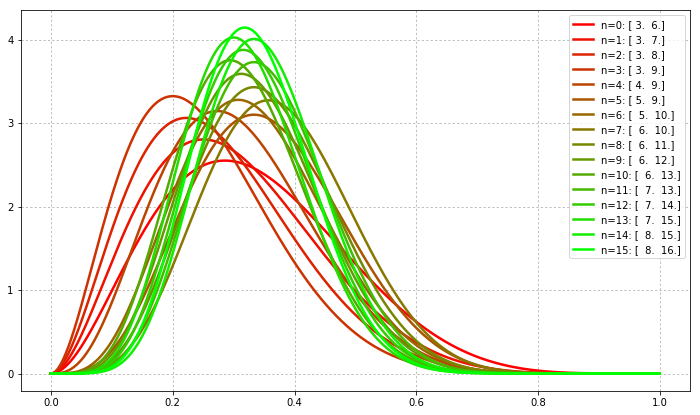

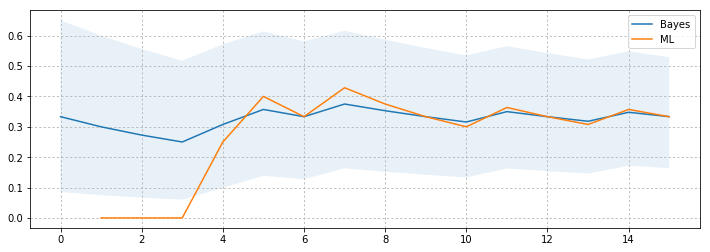

In [1043]:
draw_posteriori(grid=grid, distr_class=sps.beta, post_params=bern_posterior_params(sample2, 3, 6))
ml = sample2.cumsum() / range(1, 16)
draw_estimations(ml, distr_class=sps.beta, post_params=bern_posterior_params(sample2, 3, 6))


### Неправильно подобранные параметры

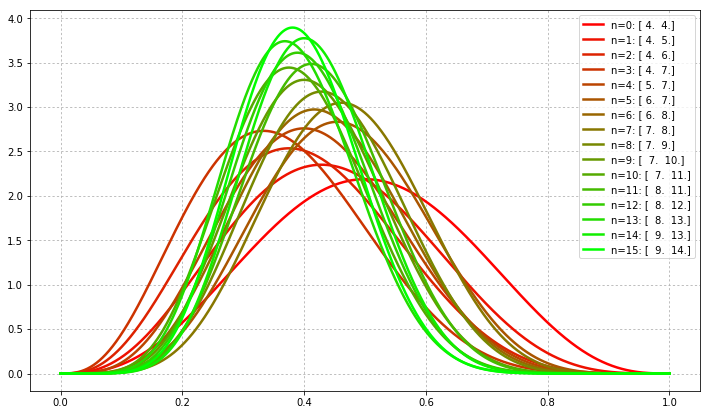

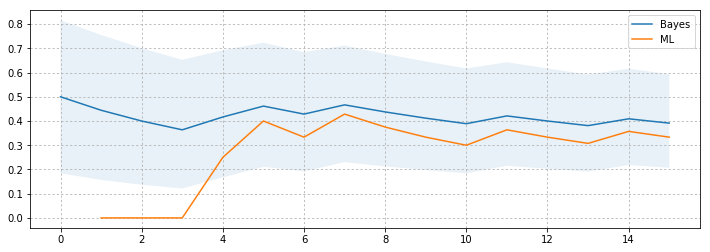

In [1044]:
draw_posteriori(grid=grid, distr_class=sps.beta, post_params=bern_posterior_params(sample2, 4, 4))
ml = sample2.cumsum() / range(1, 16)
draw_estimations(ml, distr_class=sps.beta, post_params=bern_posterior_params(sample2, 4, 4))

**Вывод:** В случае верно подобранных параметров для плотности графики апостериорных плотностей сразу сосредоточены вокруг истинного значения. В случае неверно подобранных параметров графика апостериорной плотности он в конечном итоге стабилизируется к графику, соответствующему истинному параметру. Но заметим, что при малом размере выборки это происходит не сразу. С увеличением $n$ всё встает на свои места.

При малых размерах выборки (< 3) видно сильное различие между байесовской оценки (м.о. и дов. инт.) и ОМП по причине недостаточного объема выборки. А в целом они почти одинаково аппроксимируют параметр. Заметим также, что график ОМП почти всегда лежит байесовском доверительном интервале. Когда априорное распределение подобрано верно, то байесовские оценки и ОМП практически совпадают. А если неверно, то они различаются.

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

## $\mathcal{N}(\theta, 1)$

In [27]:
def norm_posterior_params(sample, a, sigma_sq): 
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    N = len(sample)
    params = np.empty(shape=(N + 1, 2))
    for n in range(N + 1):
        params[n] = (a + sample[: n].sum())/ (1 + n * sigma_sq), sigma_sq / (1 + n * sigma_sq)
    return params

In [28]:
grid = np.linspace(-3, 3, 1000)

In [29]:
sample = sps.norm.rvs(size=15)
ml = sample.cumsum() / range(1, 16)

### Правильно подобранные параметры $(\theta = 0)$

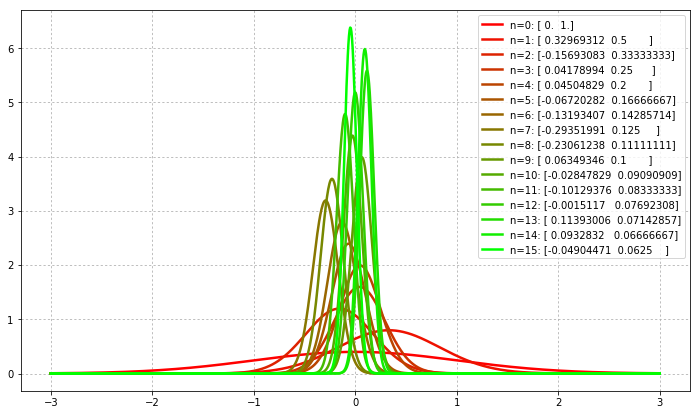

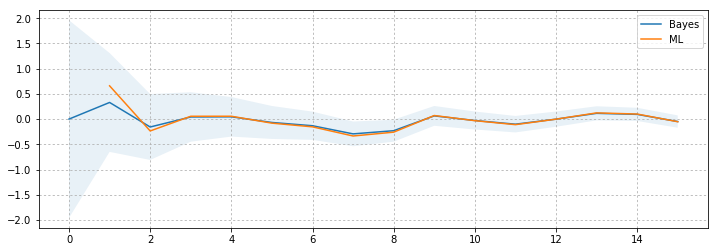

In [30]:
draw_posteriori(grid=grid, distr_class=sps.norm, post_params=norm_posterior_params(sample, 0, 1))
draw_estimations(ml, distr_class=sps.norm, post_params=norm_posterior_params(sample, 0, 1))

### Неправильно подобранные параметры $(\theta = 1)$

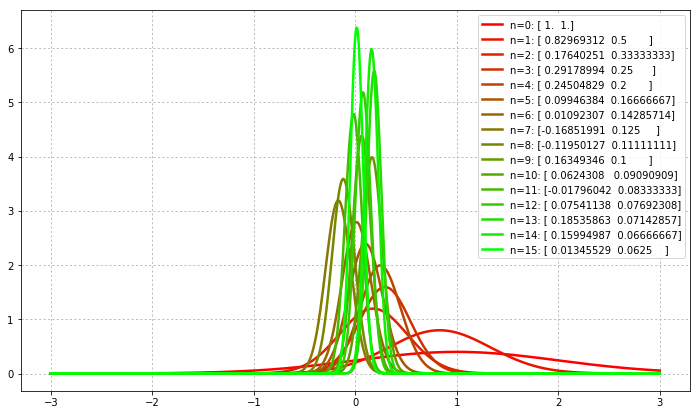

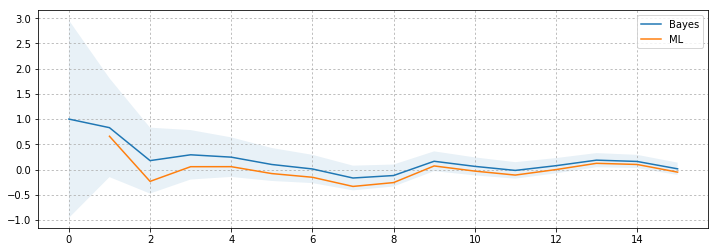

In [31]:
draw_posteriori(grid=grid, distr_class=sps.norm, post_params=norm_posterior_params(sample, 1, 1))
ml = sample.cumsum() / range(1, 16)
draw_estimations(ml, distr_class=sps.norm, post_params=norm_posterior_params(sample, 1, 1))

## $Exp(\theta)$

In [3]:
def exp_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    N = len(sample)
    params = np.empty(shape=(N + 1, 3))
    for n in range(N + 1):
        params[n] = b + n, 0, 1 / (a + sample[: n].sum())
    
    return params

In [4]:
grid = np.linspace(-1, 5, 1000)

In [22]:
sample = sps.expon.rvs(size=15, scale=1)
ml = 1 / (sample.cumsum() / range(1, 16))

### Правильно подобранные параметры

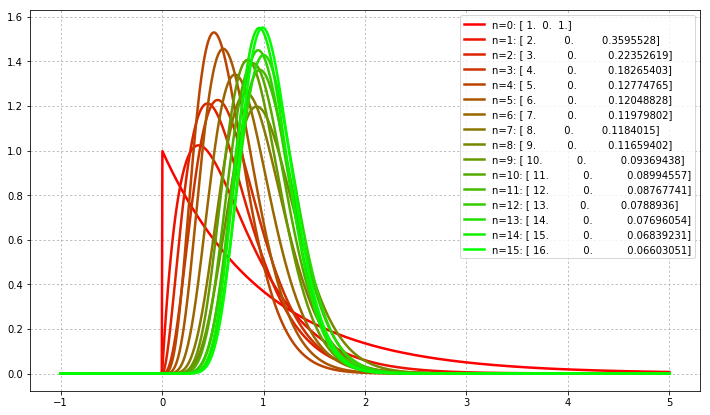

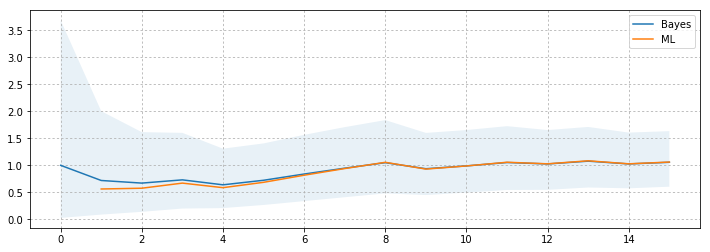

In [23]:
draw_posteriori(grid=grid, distr_class=sps.gamma, post_params=exp_posterior_params(sample, 1, 1))
draw_estimations(ml, distr_class=sps.gamma, post_params=exp_posterior_params(sample, 1, 1))

### Неравильно подобранные параметры

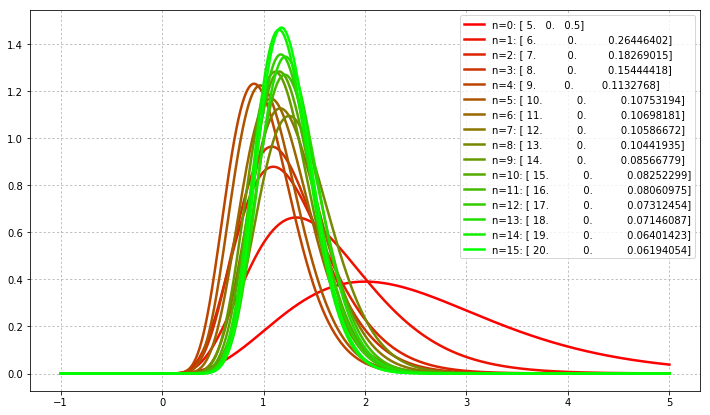

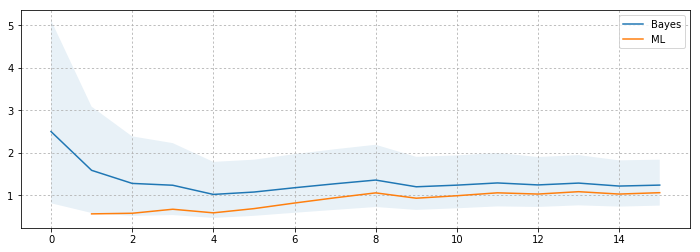

In [24]:
draw_posteriori(grid=grid, distr_class=sps.gamma, post_params=exp_posterior_params(sample, 2, 5))
draw_estimations(ml, distr_class=sps.gamma, post_params=exp_posterior_params(sample, 2, 5))

**Вывод:** В случае верно подобранных параметров для плотности графики апостериорных плотностей сразу сосредоточены вокруг истинного значения. В случае неверно подобранных параметров графика апостериорной плотности он в конечном итоге стабилизируется к графику, соответствующему истинному параметру. Но заметим, что при малом размере выборки это происходит не сразу. С увеличением $n$ всё встает на свои места.

Обратим внимание на то, что в случае верно подобранных параметров байесовская оценки м.о. и ОМП на графике (для пункта $Exp(\theta)$) распопложены довольно близко друг к другу. А для пункта $\mathcal{N}(\theta, 1)$ они вообще почти совпадают. И они довольно хорошо аппроксимируют параметр. А когда параметры подобраны неверно, то различие между ними не такое большое, как в 8 задаче, и с ростом размера выборки баесовская оценка стремиться к ОМП.

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.
